regression :　回帰問題　sinxを近似
　　参考：PyTorchで色々な非線形関数を回帰してみたらすごかった

 https://watlab-blog.com/2021/06/14/pytorch-nonlinear-regression/

In [1]:
#　colaboraory用: Google drive をマウントする
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# colaboratory用: フォルダを移る
%cd "drive/My Drive/Colab Notebooks/"

/content/drive/My Drive/Colab Notebooks


フォルダは自分の指定のものに変更して下さい。

In [3]:
%cd "ctorch211122/MiniCTorch_Prototype/notebook"

/content/drive/My Drive/Colab Notebooks/ctorch211122/MiniCTorch_Prototype/notebook


ライブラリのimport

In [4]:
!pip install lark-parser

     |████████████████████████████████| 103 kB 35.2 MB/s 


In [5]:
import sys
sys.path.append("../")

import json
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import minictorch.generator as GN
import minictorch.converter as CV

サンプルデータ

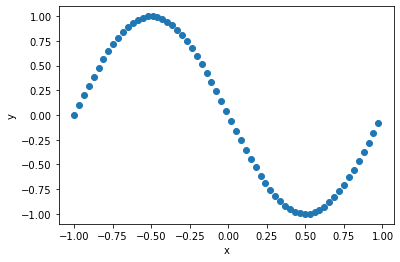

In [6]:
import matplotlib.pyplot as plt

np.random.seed(1)

input_data   = np.arange( 0, np.pi*2.0, 0.1 )
correct_data = np.sin( input_data )
n_data = len( correct_data )

# 入力を[-1.0,1.0]の範囲に
input_data = ( input_data - np.pi )/ np.pi

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter( input_data, correct_data)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.show()

ニューラルネットワークの定義

In [12]:
def mean_squared_error( x0, x1 ):
    diff = x0 - x1
    y = (diff**2).sum() / len(diff)
    return y;
"""
class Net(torch.nn.Module):
  
  def __init__( self, t ):
    super(Net, self).__init__()
    self.fc1 = torch.nn.Linear(1,32)
    self.fc2 = torch.nn.Linear(32,16)
    self.fc3 = torch.nn.Linear(16,1)
    self.target = t

  def forward(self, x):
    y = torch.nn.functional.relu(self.fc1(x))
    y = torch.nn.functional.relu(self.fc2(y))
    #y = F.sigmoid(self.fc2(x))
    y = self.fc3(y)
    #y = self.fc2(y)
    self.out = y

    #y = mean_squared_error( x, self.target )
    loss = nn.MSELoss()
    output = loss( y, self.target )
    #print('loss', output )
    return output

class Net1(torch.nn.Module):
  def __init__( self, t ):
    super(Net, self).__init__()
    self.fc1 = torch.nn.Linear(1,3)
    self.fc2 = torch.nn.Linear(3,1)
    self.target = t

  def forward(self, x):
    #y = torch.nn.functional.relu(self.fc1(x))
    y = F.sigmoid(self.fc1(x))
    y = self.fc2(y)
    self.out = y

    #y = mean_squared_error( x, self.target )
    loss = nn.MSELoss()
    output = loss( y, self.target )
    #print('loss', output )
    return output
"""
class MSE(torch.nn.Module):

  class Net( torch.nn.Module ):
    def __init__( self ):
      super().__init__()
      print("create net class")
      self.fc1 = torch.nn.Linear(1,32)
      self.fc2 = torch.nn.Linear(32,16)
      self.fc3 = torch.nn.Linear(16,1)

    def forward(self,x):
      y = torch.nn.functional.relu(self.fc1(x))
      y = torch.nn.functional.relu(self.fc2(y))
      y = self.fc3(y)
      return y

  class Loss( torch.nn.Module ):
    def __init__( self ):
      super().__init__()
      print("create loss class")

    def forward(self,y,t):
      #output = mean_squared_error( x, t )
      loss = nn.MSELoss()
      output = loss( y, t )
      return output

  def __init__( self, t ):
    super( MSE, self ).__init__()
    print("create mse class")
    self.net  = self.Net()
    self.loss = self.Loss()
    self.target = t

  def forward( self, x ):
    self.out = self.net( x )
    output = self.loss( self.out, self.target )
    return output

プロジェクト名、作業フォルダ、JSONファイル名の設定

In [13]:
project = 'regr'
folder = "./regression"
json_path = folder +'/' + project +'.json'

計算グラフをJSONファイルに出力する

In [14]:
def generate_json( json_path, input, target ):

    model = MSE( target )

    model.eval()
    with torch.no_grad():
        print("[SAVE]", json_path )
        GN.generate_minictorch_file( model, input, json_path )

    return model

In [15]:
torch.manual_seed( 1 )

input_data   = input_data.reshape(-1,1)
correct_data = correct_data.reshape(-1,1)
x_tensor = torch.from_numpy(input_data).float()
y_tensor = torch.from_numpy(correct_data).float()

batchs = 63
xb = x_tensor[0:batchs,:]
yb = y_tensor[0:batchs,:]

xb.requires_grad = True
model = generate_json( json_path, xb, yb )

create mse class
create net class
create loss class
[SAVE] ./regression/regr.json
skip: MSE/Net[net]/Linear[fc1]/weight/fc1
skip: MSE/Net[net]/Linear[fc1]/weight/fc1
skip: MSE/Net[net]/Linear[fc2]/weight/fc2
skip: MSE/Net[net]/Linear[fc2]/weight/fc2
skip: MSE/Net[net]/Linear[fc3]/weight/fc3
skip: MSE/Net[net]/Linear[fc3]/weight/fc3


一回の順伝播、逆伝播のC++コードを生成する

In [16]:
CV.convert_cpp_code( project, folder, model, xb, json_path )

[JSON] ./regression/regr.json
{'name': 'MSE/Net[net]/Linear[fc1]/weight/weight.7', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [3], 'sorted_id': 1}
{'name': 'MSE/Net[net]/Linear[fc1]/bias/bias.7', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [3], 'sorted_id': 2}
{'name': 'MSE/Net[net]/Linear[fc2]/weight/weight.9', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [7], 'sorted_id': 5}
{'name': 'MSE/Net[net]/Linear[fc2]/bias/bias.9', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [7], 'sorted_id': 6}
{'name': 'MSE/Net[net]/Linear[fc3]/weight/weight', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [11], 'sorted_id': 9}
{'name': 'MSE/Net[net]/Linear[fc3]/bias/bias', 'op': 'prim::GetAttr', 'in': [], 'output_id': 0, 'shape': [], 'out': [11], 'sorted_id': 10}
[PARAM] ./regression/regr_param.cpp
{'name': 'input/x', 'op': 'IO Node', 'in': [], 'output_id': 0, 'shape': [63, 1], 'out': [

In [ ]:
# check code
with torch.set_grad_enabled(True):
  model.train()
  yy = model( xb )
  print("output",yy)
  print("out",model.out.shape)
  yy.backward()
  #print("input",xb.grad)

output tensor(0.5289, grad_fn=<MseLossBackward0>)
out torch.Size([63, 1])


C++コードをコンパイル、リンクする

In [ ]:
!g++ -std=c++14 ./regression/regr.cpp ./regression/regr_param.cpp -D_NOTEBOOK -I ../../../xtensor -lcblas -o ./regression/regr

In [ ]:
!./regression/regr

### forward computation ...
 0.528857
### backward computation ...
input_grad{{ 0.000114},
 { 0.00021 },
 { 0.000305},
 {-0.000047},
 {-0.000057},
 {-0.000067},
 {-0.000077},
 {-0.000086},
 {-0.000094},
 {-0.000101},
 {-0.000108},
 {-0.000731},
 {-0.00076 },
 {-0.000783},
 { 0.000304},
 { 0.000307},
 { 0.000308},
 { 0.000336},
 { 0.000331},
 {-0.000714},
 {-0.000689},
 {-0.000657},
 {-0.001141},
 {-0.001062},
 {-0.000946},
 {-0.000853},
 {-0.000752},
 {-0.00026 },
 {-0.000441},
 {-0.000346},
 {-0.000248},
 {-0.000148},
 {-0.000049},
 { 0.00005 },
 { 0.000148},
 { 0.000243},
 { 0.000335},
 { 0.000422},
 { 0.000504},
 { 0.00058 },
 { 0.000649},
 { 0.00114 },
 { 0.001227},
 { 0.0013  },
 { 0.001245},
 { 0.001285},
 { 0.00131 },
 { 0.001321},
 { 0.001318},
 { 0.0013  },
 { 0.001268},
 { 0.001222},
 { 0.001163},
 { 0.001091},
 { 0.001007},
 { 0.000451},
 { 0.000398},
 { 0.000341},
 { 0.000279},
 { 0.000215},
 { 0.000147},
 {-0.000025},
 {-0.000002}}


学習ループの実行(python版)

In [ ]:
torch.manual_seed( 1 )

epochs = 2000

model = MSE( y_tensor )
model.train()

lr = 0.01
opt = torch.optim.SGD(model.parameters(), lr)
#opt = torch.optim.Adam(net.parameters(), lr )

x_tensor.requires_grad = True

batch_size = 9
n_batch = len(x_tensor) // batch_size  # 1エポックあたりのバッチ数
print("batch ",n_batch,batch_size)

epoch_loss = []
for i in range(epochs):

    # -- 学習 -- 
    """
    opt.zero_grad()
    loss = net( x_tensor )
    total_loss = loss;
    loss.backward()
    opt.step()
    """
    # ミニバッチ
    index_random = np.arange( n_data )
    np.random.shuffle( index_random )  # インデックスをシャッフルする

    total_loss = 0.0
    for idx in range(n_batch):
        
        # ミニバッチを取り出す
        """
        x = x_tensor[ idx:idx+1 ]
        t = y_tensor[ idx:idx+1 ]
        #print(idx,x,t)
        """
        mb_index = index_random[ idx*batch_size : (idx+1)*batch_size ]
        x = x_tensor[ mb_index,:]
        t = y_tensor[ mb_index,:]
        
        # 順伝播と逆伝播
        model.target = t
        loss = model( x )
        total_loss += loss;
        #print("loss",loss)

        opt.zero_grad()
        loss.backward()
        opt.step()
    #"""
    # -- 誤差 --
    print("epoch: {} loss: {}".format(i, total_loss))
    epoch_loss.append( total_loss )

#model.target = y_tensor
#output = model.net( x_tensor )

create mse class
create net class
create loss class
batch  7 9
epoch: 0 loss: 3.6137804985046387
epoch: 1 loss: 3.3821678161621094
epoch: 2 loss: 3.202080726623535
epoch: 3 loss: 3.0389387607574463
epoch: 4 loss: 2.892347574234009
epoch: 5 loss: 2.7466061115264893
epoch: 6 loss: 2.607574224472046
epoch: 7 loss: 2.4707014560699463
epoch: 8 loss: 2.366652250289917
epoch: 9 loss: 2.2197821140289307
epoch: 10 loss: 2.106710910797119
epoch: 11 loss: 2.001077175140381
epoch: 12 loss: 1.898061752319336
epoch: 13 loss: 1.8142292499542236
epoch: 14 loss: 1.712435007095337
epoch: 15 loss: 1.6313889026641846
epoch: 16 loss: 1.5574402809143066
epoch: 17 loss: 1.4987297058105469
epoch: 18 loss: 1.4270440340042114
epoch: 19 loss: 1.3785794973373413
epoch: 20 loss: 1.3321973085403442
epoch: 21 loss: 1.2915774583816528
epoch: 22 loss: 1.2500698566436768
epoch: 23 loss: 1.2205064296722412
epoch: 24 loss: 1.2030972242355347
epoch: 25 loss: 1.173769235610962
epoch: 26 loss: 1.153060793876648
epoch: 27 lo

In [ ]:
model.target = y_tensor
output = model.net( x_tensor )
print( x_tensor )

tensor([[-1.0000],
        [-0.9682],
        [-0.9363],
        [-0.9045],
        [-0.8727],
        [-0.8408],
        [-0.8090],
        [-0.7772],
        [-0.7454],
        [-0.7135],
        [-0.6817],
        [-0.6499],
        [-0.6180],
        [-0.5862],
        [-0.5544],
        [-0.5225],
        [-0.4907],
        [-0.4589],
        [-0.4270],
        [-0.3952],
        [-0.3634],
        [-0.3315],
        [-0.2997],
        [-0.2679],
        [-0.2361],
        [-0.2042],
        [-0.1724],
        [-0.1406],
        [-0.1087],
        [-0.0769],
        [-0.0451],
        [-0.0132],
        [ 0.0186],
        [ 0.0504],
        [ 0.0823],
        [ 0.1141],
        [ 0.1459],
        [ 0.1777],
        [ 0.2096],
        [ 0.2414],
        [ 0.2732],
        [ 0.3051],
        [ 0.3369],
        [ 0.3687],
        [ 0.4006],
        [ 0.4324],
        [ 0.4642],
        [ 0.4961],
        [ 0.5279],
        [ 0.5597],
        [ 0.5915],
        [ 0.6234],
        [ 0.

収束状況グラフを描画する

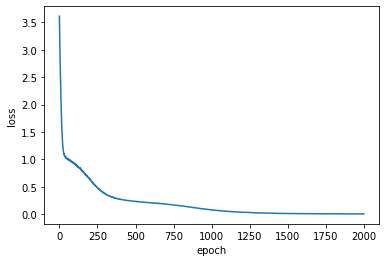

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(list(range(len(epoch_loss))), epoch_loss)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
fig.show()

評価データを描画する

(63, 1)


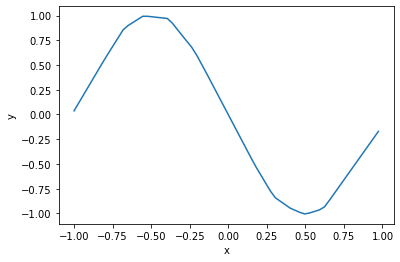

In [ ]:
o = output.to('cpu').detach().numpy().copy()
print(o.shape)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(input_data, o)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.show()

学習用データファイル、学習ループのC++コードを生成する

In [ ]:
CV.convert_data_file( project, folder, inp_data=input_data, target_data=correct_data )
CV.convert_train_code( project, folder, json_path, sol="regr", epochs=2000, batch=9, inp_data=input_data, target_data=correct_data )

datafile key :  inp_data
datafile key :  target_data
[DATA] ./regression/regr_data.cpp
[JSON] ./regression/regr.json
epoch_num :  2000
batch_size :  9
lr :  0.01
inp  shape :  1 {63,1}
inp2 shape :  0 
target shape :  1 {63,1}
pred_num :  63
div :  False
pred_pos :  12 12 12
el  0 1  :  input/x IO Node [] 0 -1
el  3 1  :  MSE/Net[net]/Linear[fc1]/input.1 aten::linear [0, 1, 2] 0 -1
el  4 1  :  MSE/Net[net]/input.3 aten::relu [3] 0 -1
el  7 1  :  MSE/Net[net]/Linear[fc2]/input.5 aten::linear [4, 5, 6] 0 -1
el  8 1  :  MSE/Net[net]/input.7 aten::relu [7] 0 -1
el  11 1  :  MSE/Net[net]/Linear[fc3]/input.9 aten::linear [8, 9, 10] 0 -1
el  18 1  :  MSE/Loss[loss]/94 aten::mse_loss [15, 16, 17] 0 -1
 --- pred el ( 0 ) : 15  ->  11
loss pred_id :  18 11
eval no : 18  (type= 1 ) :  11 12
last cmd: 18
------
solution : regr
pred_no   : 11
target_no : 12
class_no  : 0
pred_no :  11
pred_type :  2
[TRAIN]  ./regression/regr_train.cpp


学習用C++コードをコンパイル、リンクする

In [ ]:
!g++ -std=c++14 ./regression/regr_train.cpp ./regression/regr_param.cpp ./regression/regr.cpp ./regression/regr_data.cpp -D_NOTEBOOK -D_TRAIN -I ../../../xtensor -lcblas -o ./regression/regr_train

(注意) xtensorフォルダにxtensor関連のincludeファイルを置いています。

In [ ]:
!./regression/regr_train

epoch_num : 2000
indata shape   : 63,1
batch  number  : 7,9
learning ratio : 0.01
total_loss : epoch 0 - loss 3.6291
epoch 0 - loss 0.494218
total_loss : epoch 1 - loss 3.37867
epoch 1 - loss 0.465534
total_loss : epoch 2 - loss 3.20884
epoch 2 - loss 0.441772
total_loss : epoch 3 - loss 3.03129
epoch 3 - loss 0.419926
total_loss : epoch 4 - loss 2.89771
epoch 4 - loss 0.398791
total_loss : epoch 5 - loss 2.7474
epoch 5 - loss 0.378773
total_loss : epoch 6 - loss 2.59818
epoch 6 - loss 0.359284
total_loss : epoch 7 - loss 2.47471
epoch 7 - loss 0.340885
total_loss : epoch 8 - loss 2.34494
epoch 8 - loss 0.323585
total_loss : epoch 9 - loss 2.23556
epoch 9 - loss 0.306924
total_loss : epoch 10 - loss 2.11225
epoch 10 - loss 0.290817
total_loss : epoch 11 - loss 1.99432
epoch 11 - loss 0.275707
total_loss : epoch 12 - loss 1.89782
epoch 12 - loss 0.261583
total_loss : epoch 13 - loss 1.79782
epoch 13 - loss 0.248281
total_loss : epoch 14 - loss 1.73392
epoch 14 - loss 0.236211
total_loss

In [ ]:
# read output file from c++ code
path = folder + '/' + project + '.out'
f = open( path, 'r')

epoch_loss = []

datalist = f.readlines()
for data in datalist:
  epoch_loss.append( float(data) )

f.close()

print("epoch =", len(epoch_loss))
print( epoch_loss)

path = folder + '/' + project + '.pred'
f2 = open( path, 'r')

x_new = []
y_pred = []
k = 0
datalist = f2.readlines()
for data in datalist:
  #print(data)
  ds = data.split(',')
  if k == 0:
    print(ds)
    n1 = int(ds[0])
    n2 = int(ds[1])
  else:
    x_new.append( input_data[k-1,0] )
    y_pred.append( float(ds[0]) )
  k = k+1

f2.close()

print("pred =", len(x_new))
print( x_new )
print( y_pred )


epoch = 2000
[0.494218, 0.465534, 0.441772, 0.419926, 0.398791, 0.378773, 0.359284, 0.340885, 0.323585, 0.306924, 0.290817, 0.275707, 0.261583, 0.248281, 0.236211, 0.224994, 0.21507, 0.206208, 0.198375, 0.191401, 0.185117, 0.179774, 0.175224, 0.171052, 0.1676, 0.164671, 0.161918, 0.159665, 0.157721, 0.156139, 0.154487, 0.15314, 0.151929, 0.150911, 0.150055, 0.149196, 0.148495, 0.147906, 0.147248, 0.146743, 0.14627, 0.14583, 0.145465, 0.145138, 0.144711, 0.144369, 0.143945, 0.143659, 0.143319, 0.143016, 0.142711, 0.142436, 0.142152, 0.14185, 0.141572, 0.141389, 0.141229, 0.140784, 0.140527, 0.140279, 0.14, 0.13974, 0.139482, 0.139215, 0.138953, 0.138692, 0.13844, 0.138382, 0.138108, 0.137663, 0.137521, 0.137161, 0.137021, 0.136627, 0.136358, 0.13622, 0.135855, 0.135578, 0.135354, 0.135048, 0.134798, 0.134555, 0.134226, 0.133953, 0.133675, 0.133397, 0.133123, 0.132846, 0.132581, 0.132335, 0.131983, 0.131687, 0.131501, 0.131128, 0.130894, 0.130605, 0.130247, 0.129941, 0.129637, 0.129332, 

収束状況グラフを描画する

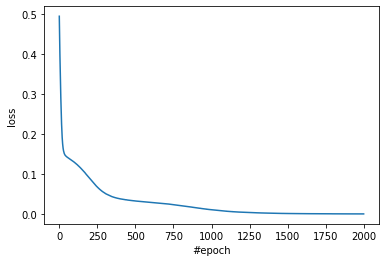

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(list(range(len(epoch_loss))), epoch_loss)
ax.set_xlabel('#epoch')
ax.set_ylabel('loss')
fig.show()

評価データを描画する

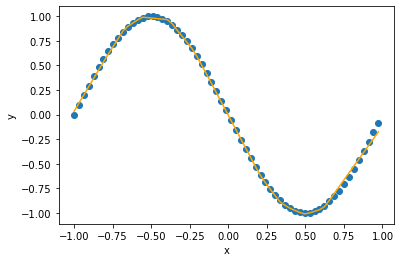

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(input_data,correct_data )
ax.plot( x_new, y_pred, c='orange')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.show()